In [143]:
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import MultiPoint

DATA_DIR = Path("../data/processed")
MODEL_DIR = Path("../models")

data = pd.read_csv(DATA_DIR / "income_tax_record_1880.csv")

In [144]:
# Gini coefficent

def gini(x: np.ndarray) -> float:
    incomes = np.sort(x) / x.sum()
    g = 1 - 2 * np.sum(incomes.cumsum() / x.shape[0])
    return np.round(g, 3)

gini(data.total_income)

0.704

In [150]:
# Percentiles

percentiles, bins = pd.qcut(data.total_income, 10, duplicates='drop', retbins=True,)
data['percentiles'] = percentiles
crosstab = pd.crosstab(index=data.district, columns=data.percentiles)
crosstab_pct = pd.crosstab(index=data.district, columns=data.percentiles, normalize='index').round(3) * 100

In [151]:
crosstab.loc[['Valli', 'Pietarin_esikaupunki', 'Viipurin_esikaupunki']].iloc[:,-10:] # top 10 percentiles

percentiles,"(-0.001, 1.0]","(1.0, 2.0]","(2.0, 4.0]","(4.0, 10.0]","(10.0, 562.0]"
district,,,,,
Valli,279,132,84,112,153
Pietarin_esikaupunki,543,125,104,88,44
Viipurin_esikaupunki,123,52,48,28,25


In [152]:
crosstab_pct.loc[['Valli', 'Pietarin_esikaupunki', 'Viipurin_esikaupunki']].iloc[:,-10:]

percentiles,"(-0.001, 1.0]","(1.0, 2.0]","(2.0, 4.0]","(4.0, 10.0]","(10.0, 562.0]"
district,,,,,
Valli,36.7,17.4,11.1,14.7,20.1
Pietarin_esikaupunki,60.1,13.8,11.5,9.7,4.9
Viipurin_esikaupunki,44.6,18.8,17.4,10.1,9.1


<AxesSubplot: ylabel='district'>

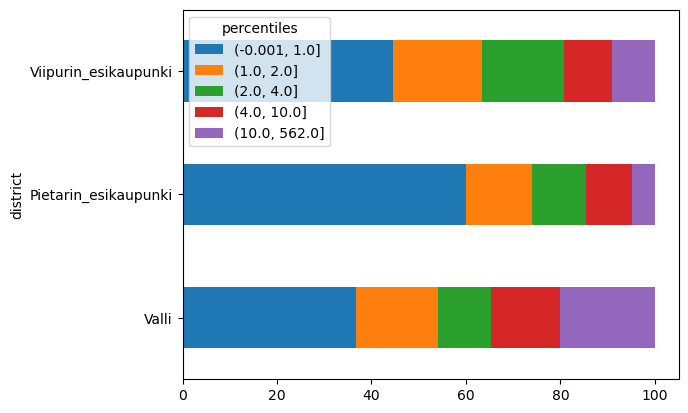

In [153]:
crosstab_pct.loc[['Valli', 'Pietarin_esikaupunki', 'Viipurin_esikaupunki']].plot(kind='barh', stacked=True)